# Environment setting

In [1]:
# move to source directory
%cd ../
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection
LICENSE*    data/                   log/          slackauth.json*
Makefile*   deprecated/             model/        startup-jupyter.sh*
README.md*  feature/                notebook/     test/
config/     kaggle-submit-ieee.sh*  run_gbdt.py*  util/


In [3]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()
from util.easydict import EasyDict
import json

In [40]:
version = '0012'
use_small_data = False
dsize = '.small' if use_small_data is True else ''

# import config
r = json.load(open(f'config/result_{version}{dsize}.json'))
r = EasyDict(r)
r

{'features': ['magic'],
 'model': {'type': 'xgb',
  'params': {'booster': 'gbtree',
   'nthread': 4,
   'learning_rate': 0.02,
   'min_split_loss': 0,
   'max_depth': 12,
   'min_child_weight': 1,
   'subsample': 0.8,
   'colsample_bytree': 0.4,
   'tree_method': 'hist',
   'eval_metric': 'auc'}},
 'train': {'n_splits': 5,
  'num_boost_round': 2000,
  'early_stopping_rounds': 100,
  'optimize_num_boost_round': False},
 'runtime': {'version': '0012',
  'use_small_data': False,
  'no_send_message': False,
  'random_seed': 42},
 'scores': {},
 'paths': {'out_train_path': 'data/feature/transformed_0012_train.pkl',
  'out_test_path': 'data/feature/transformed_0012_test.pkl',
  'out_model_dir': 'data/model/model_0012_xgb.pkl',
  'out_sub_path': 'data/submission/submission_0012.csv',
  'main_log_path': 'log/main_0012.log',
  'train_log_path': 'log/train_0012.tsv',
  'result': 'config/result_0012.json'},
 'executed': True}

# Read data

In [41]:
log = pd.read_csv(r.paths.train_log_path, delimiter='\t')
print(log.shape)
log.head()

(1999, 4)


,000,000001,0.861042,0.818753
0,0,2,0.882466,0.849518
1,0,3,0.887058,0.852409
2,0,4,0.890212,0.855947
3,0,5,0.894989,0.862860
4,0,6,0.899214,0.864954


In [42]:
sns.lineplot(x="iteration", y="train_auc", data=log)
sns.lineplot(x="iteration", y="val_auc", data=log)
plt.ylabel('auc')

ValueError: Could not interpret input 'iteration'

In [36]:
importance = pd.read_csv(r.paths.importance_path)
importance.columns = ['feature', 'importance']
importance.head()

,feature,importance
0,TransactionAmt,39.422702
1,ProductCD,45.917821
2,card1,355.807907
3,card2,26.549333
4,card3,0.000000


In [37]:
data = importance.sort_values(by="importance", ascending=False)[0:20]
data.head()

,feature,importance
189,addr1_FE,773.099882
225,D15_uid_mean,665.402065
209,D9_card1_addr1_P_emaildomain_std,519.377647
13,C1,476.076775
191,card2_FE,450.902917


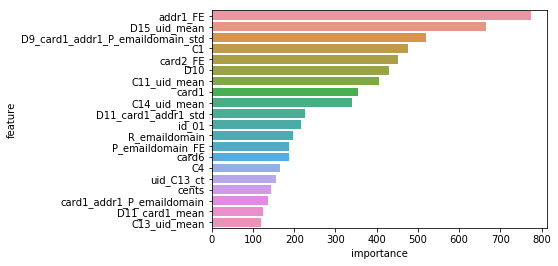

In [38]:
sns.barplot(x="importance", y="feature", data=data);